<a href="https://colab.research.google.com/github/ishantk/GW2021PY1/blob/master/MachineLearning_B1_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning
--

Let Machine learn from Data to give results.

As of now we have created an algo to solve a problem
majorly we have created some functions, which will take inputs and will give us the output

Create an Algo based on some data
10 -> 90
8  -> 80
12 -> 93
7  -> 82
5  -> 60

9  -> ?


1  -> 15000
2  -> 18000
3  -> 22000
4  -> 25000
5  -> 30000


12 -> ?


ML is training the algo on data, and later providing predictions on unseen data!


ML Model is an Algo which is processing the data.

Machine Learning
--
* Supervised Machine Learning.  -> Here we do provide data
  * Regression
  * Classification
* UnSupervised Machine Learning -> Here we do not provide data
  * Clustering




Linear Regression
--

Regression is predicting the unseen data

X = [1, 2, 3, 4, 5]

Y = [2, 4, 5, 4, 5]


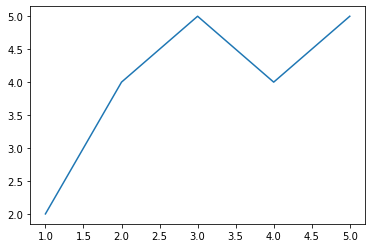

In [ ]:
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5]
Y = [2, 4, 5, 4, 5]

plt.plot(X, Y)
plt.show()

Mathematically, We have Equation of Line

Y = b0 + b1*X

b0 -> Interceptor

b1 -> Slope of Line

STEP1
--

Mean of X (MX) <br> 
(1+2+3+4+5) / 5 -> 3 <br>
Mean of Y (MY) -> 4 <br>

Create Table<br>
X   Y   X-MX   Y-MY   sq(X-MX)   (X-MX)(Y-MY)<br>
1   2   -2     -2     4           4<br>
2   4   -1      0     1           0<br>
3   5    0      1     0           0<br>
4   4    1      0     1           0<br>
5   5    2      1     4           2<br>


STEP2
--

SUM of sq(X-MX) : 10 <br>
SUM of (X-MX)(Y-MY): 6 <br>

SLOPE OF LINE b1 is: [SUM of (X-MX)(Y-MY)] / [SUM of sq(X-MX)] <br>
b1: 6/10<br>
b1 is: 0.6 <br>

Y = b0 + 0.6X <br>

Evaluate b0, by substituting Mean X and Mean Y in the Equation<br>
4 = b0 + 0.6*3<br>

b0 = 4 - 1.8<br>
b0 = 2.2<br>



In [ ]:
X = [1, 2, 3, 4, 5]
Y = [2, 4, 5, 4, 5]

mean_x = sum(X)/len(X)
mean_y = sum(Y)/len(Y)

print("mean_x:", mean_x)
print("mean_y:", mean_y)

mean_x: 3.0
mean_y: 4.0


In [ ]:
table = {
    "X": X,
    "Y": Y,
    "X-MX": [],
    "Y-MY": [],
    "sq-X-MX": [],
    "X-MX-Y-MY": [],
}

for i in range(len(X)):
  x_minus_mean_x = X[i] - mean_x
  y_minus_mean_y = Y[i] - mean_y
  x_minus_mean_x_square = x_minus_mean_x ** 2
  x_mean_x_into_y_mean_y = x_minus_mean_x * y_minus_mean_y
  table["X-MX"].append(x_minus_mean_x)
  table["Y-MY"].append(y_minus_mean_y)
  table["sq-X-MX"].append(x_minus_mean_x_square)
  table["X-MX-Y-MY"].append(x_mean_x_into_y_mean_y)

print(table)  


{'X': [1, 2, 3, 4, 5], 'Y': [2, 4, 5, 4, 5], 'X-MX': [-2.0, -1.0, 0.0, 1.0, 2.0], 'Y-MY': [-2.0, 0.0, 1.0, 0.0, 1.0], 'sq-X-MX': [4.0, 1.0, 0.0, 1.0, 4.0], 'X-MX-Y-MY': [4.0, -0.0, 0.0, 0.0, 2.0]}


In [ ]:
b1 = sum(table["X-MX-Y-MY"])/sum(table["sq-X-MX"])
print("b1:", b1)

b1: 0.6


In [ ]:
# Y = b0 + b1*X
# b0 = Y - b1*X 
b0 = mean_y - b1*mean_x
print("b0 is:", b0)

b0 is: 2.2


In [ ]:
def predict(x):
  y = b0 + b1 * x
  print("Y is:", y)
  return y

In [ ]:
predict(9)

Y is: 7.6


7.6

Errors
--
  * Mean Squared Error

In [ ]:
# Predicted values of Y for the Original X Values
Y_hat = []

for i in range(len(X)):

  y = predict(X[i])
  print(Y[i], y)
  Y_hat.append(y)


Y is: 2.8000000000000003
2 2.8000000000000003
Y is: 3.4000000000000004
4 3.4000000000000004
Y is: 4.0
5 4.0
Y is: 4.6
4 4.6
Y is: 5.2
5 5.2


In [ ]:
print("ORIGINAL Y")
Y

ORIGINAL Y


[2, 4, 5, 4, 5]

In [ ]:
print("PREDICTED Y")
Y_hat

PREDICTED Y


[2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2]

MEAN SQUARED ERROR COMPUTATION

MX - 3 <br>
MY - 4 <br>
X Y Y_Hat Y-MY sq(Y-MY) Y_hat-MY sq(Y_hat-MY)<br>
1 2 2.8   -2    4       -1.2       1.44<br>
2 4 3.4    0    0       -0.6       0.36<br>
3 5 4.0    1    1        0         0<br>
4 4 4.6    0    0        0.6       0.36<br>
5 5 5.2    1    1        1.2       1.44<br>
               ---                 -----<br>
                6                   3.6<br>

Computation

Sum of Sq(Y_hat-MY) / Sum of sq(Y-MY)<br>
3.6/6<br>
MSE -> 0.6<br>
Ideal Range must be between 0 and 1



In [ ]:
# MSE can be minimized with various techniques.
# One of it is Gradient Descent

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Prepare the DataSet
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 5, 4, 5])

print(X, X.shape)
print(Y, Y.shape)

# We need to Reshape as LinearRegression ML Model from scikit works on 2d array
X = X.reshape(len(X), 1)
Y = Y.reshape(len(Y), 1)

print(X, X.shape)
print(Y, Y.shape)

# 2. Create the Model
model = LinearRegression() # Object Construction Statement

# Train the Model
model.fit(X, Y)

print(model.coef_)      # b1
print(model.intercept_) # b0

print(model.predict([[9], [8], [3]]))

[1 2 3 4 5] (5,)
[2 4 5 4 5] (5,)
[[1]
 [2]
 [3]
 [4]
 [5]] (5, 1)
[[2]
 [4]
 [5]
 [4]
 [5]] (5, 1)
[[0.6]]
[2.2]
[[7.6]
 [7. ]
 [4. ]]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

In [ ]:
table = pd.read_csv("advertising.csv")
table

,SrNo,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
X = table.TV.values
Y = table.Sales.values

print(X)
print(Y)

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 11

In [ ]:
X = X.reshape(len(X), 1)
Y = Y.reshape(len(Y), 1)

print(X)
print(Y)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [ ]:
model = LinearRegression()
model.fit(X, Y)
print(model.coef_)
print(model.intercept_)

[[0.04753664]]
[7.03259355]


In [ ]:
Y_hat = model.predict(X)
print(Y)
print(Y_hat)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


In [ ]:
score = r2_score(Y, Y_hat)
print("R2 SCORE", score)

R2 SCORE 0.611875050850071


In [ ]:
Y_Pred = model.predict([[50]])
Y_Pred

array([[9.40942557]])

# Classification
Decision Trees

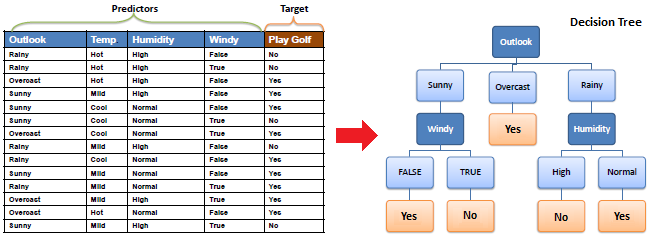

In [ ]:
from sklearn import tree

"""
Vehicle1 -> Bike -> 0
Vehicle2 -> Car ->  1

weight    engine    label
200       100       0     
220       150       0  
250       200       0  
280       150       0  
310       280       0 

800       800       1
1000      1100      1
1200      1250      1
1500      1450      1
1800      1670      1

"""

# Step1: Prepare Your DataSet
# INPUT
data_set_features = [
    [200, 100],
    [220, 150],
    [250, 200],
    [280, 150],
    [300, 280],
    
    [800, 800],
    [1000, 1100],
    [1200, 1250],
    [1500, 1450],
    [1800, 1670],
]

# OUTPUT
daat_set_labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#            0.     1. 
labels = ["BIKE", "CAR"]

# Step2: Create ML Model
# DTC works on a key concept of information gain
# it will find the attribut with highest information gain and than form a tree accordingly
model = tree.DecisionTreeClassifier() # DecisionTreeClassifier its a built in class from sklearn

# Step3: Train the Model
# DataSet willbe fed to the model for training
# To the model we are telling what is input and what is output
# Supervised Machine Learning
model.fit(data_set_features, daat_set_labels)

# Step4: Make Predictions
# Predictions

# known_observation = [220, 150]
# unknown_observation = [268, 188]

# known_observation = [1200, 1250]
# unknown_observation = [1468, 1288]

observation1 = [268, 188]
observation2 = [1468, 1288]

result = model.predict([observation1, observation2])
print(result)

print(observation1, "belongs to the class", result[0], labels[result[0]])
print(observation2, "belongs to the class", result[1], labels[result[1]])

# COVID Case Study :)
# Create a decision tree classifier:
# Attribute/Inputs/Features: cough(1/0), temperature, breathing(1/0), fatigue(1/0)
# Output/Label: Yes(1)/No(0)

"""
this is how we can create the dataset and use it for COVID Prediction
1, 99.2, 0, 1,   1
0, 99.1, 0, 0,   0
"""


[0 1]
[268, 188] belongs to the class 0 BIKE
[1468, 1288] belongs to the class 1 CAR


In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

In [ ]:
# Step1: Prepare the DataSet
iris_data_set = load_iris()
iris_data_set

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
input_features = iris_data_set.data
input_features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
output_labels = iris_data_set.target
output_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Step2: Create the Model
model = tree.DecisionTreeClassifier()

In [ ]:
# Step3: Train The Model
model.fit(input_features, output_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Step4: Predictions
observation1 = [4.9, 3. , 1.4, 0.2] # 0
observation2 = [6.2, 3.4, 5.4, 2.3] # 2

result = model.predict([observation1, observation2])
print(result)

[0 2]


In [ ]:
from sklearn import metrics

# Original Output
Y = output_labels

# predicting the output for original input
# Predicted Output
y = model.predict(input_features)

accuracy = metrics.accuracy_score(Y, y)
print("ACCURACY:", accuracy)

ACCURACY: 1.0


In [ ]:
# we can break our dataset into training and testing parts
from sklearn.model_selection import train_test_split 

input_features = iris_data_set.data
output_labels = iris_data_set.target

x_train, x_test, y_train, y_test = train_test_split(input_features, output_labels, test_size=0.3, random_state=1)

model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY:", accuracy)

ACCURACY: 0.9555555555555556
